<a href="https://colab.research.google.com/github/adalbertii/modele-NLP/blob/main/NLP_Data_Preprocessing_and_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [152]:
train_df=pd.read_csv('/content/drive/MyDrive/dane/IMDB Dataset.csv')
train_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [109]:
len(train_df),train_df.index.shape[-1]

(50000, 50000)

In [110]:
import numpy as np
import pandas as pd
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

#stop_words = stopwords.words('english')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
print("Kształt  Dataset".format(),train_df.shape)

Kształt  Dataset (50000, 2)


**Analiza statystyczna - cz. 1**

In [112]:
good_reviews=train_df[train_df['sentiment']=='positive']['review']
bad_reviews=train_df[train_df['sentiment']=='negative']['review']
print("Przykłady dobrych recenzji    \n".format(),good_reviews[:10])
print("Przykłady negatywnych recenzji\n".format(),bad_reviews[:10])

Przykłady dobrych recenzji    
 0     One of the other reviewers has mentioned that ...
1     A wonderful little production. <br /><br />The...
2     I thought this was a wonderful way to spend ti...
4     Petter Mattei's "Love in the Time of Money" is...
5     Probably my all-time favorite movie, a story o...
6     I sure would like to see a resurrection of a u...
9     If you like original gut wrenching laughter yo...
14    This a fantastic movie of three prisoners who ...
16    Some films just simply should not be remade. T...
18    I remember this film,it was the first film i h...
Name: review, dtype: object
Przykłady negatywnych recenzji
 3     Basically there's a family where a little boy ...
7     This show was an amazing, fresh & innovative i...
8     Encouraged by the positive comments about this...
10    Phil the Alien is one of those quirky films wh...
11    I saw this movie when I was about 12 when it c...
12    So im not a big fan of Boll's work but then ag...
13    The ca

In [113]:
#liczba dobrych i złych recenzji
count=train_df['sentiment'].value_counts()


In [114]:
print('Całkowita liczba pozytywnych i negatywnych recencji:\n'.format(),count)

Całkowita liczba pozytywnych i negatywnych recencji:
 positive    25000
negative    25000
Name: sentiment, dtype: int64


In [115]:
print("==============")
# Definicja funkcji do utworzenia wykresu liczby negatywnych i pozytywnych recencji.
# Wykorzystanie matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar('Poz',count_good,width=0.6,label='Recencje pozytywne',color='Green')
   # plt.legend()
    plt.bar('Neg',count_bad,width=0.6,label='Recenzje negatywne',color='Red')
    #plt.legend()
    plt.ylabel('Liczba recenzji ')
    plt.xlabel('Typ recenzji ')
    plt.show()


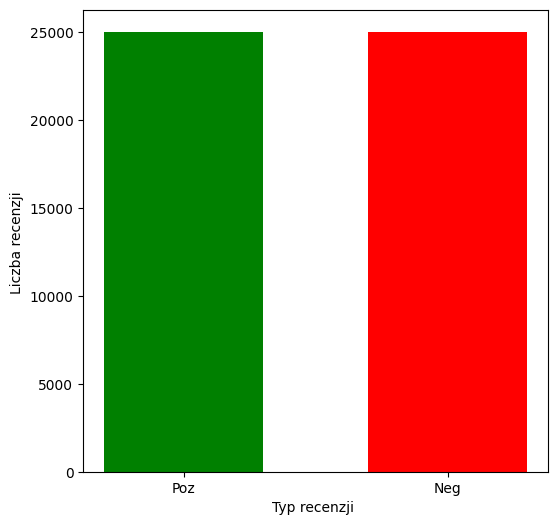

In [116]:
count_good=train_df[train_df['sentiment']=='positive']
count_bad=train_df[train_df['sentiment']=='negative']
plot_counts(len(count_good),len(count_bad))

In [117]:
# Analiza liczby wyrazó w każdym podzbiorze - pozytwnych i negatywnych recenzji

# Definicja funkcji do wyliczania liczby wyrazów
def cal_len(data):
    return len(data)

# Definicja funkcji wykresu.
# Wykorzystanie biblioteki Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.histplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.histplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()


In [118]:
count_good_words=count_good['review'].str.split().apply(lambda z:cal_len(z))
count_bad_words=count_bad['review'].str.split().apply(lambda z:cal_len(z))




In [55]:
count_good_words.shape

(25000,)

In [57]:
m = max(count_good_words)
m

2470

In [119]:
print("Positive Review Words:" + str(count_good_words))
print("Negative Review Words:" + str(count_bad_words))

Positive Review Words:0        307
1        162
2        166
4        230
5        119
        ... 
49983    133
49985    216
49989    173
49992    170
49995    194
Name: review, Length: 25000, dtype: int64
Negative Review Words:3        138
7        174
8        130
10        96
11       180
        ... 
49994    134
49996    112
49997    230
49998    212
49999    129
Name: review, Length: 25000, dtype: int64


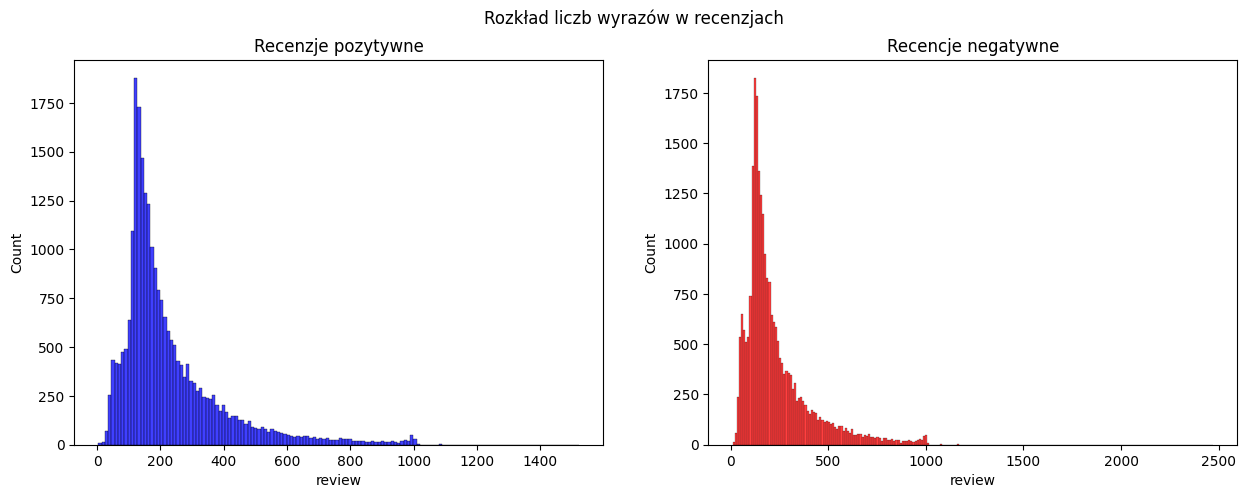

In [120]:
plot_count(count_good_words,count_bad_words,"Recenzje pozytywne","Recencje negatywne","Rozkład liczb wyrazów w recenzjach ")

Maksymalna liczba wyrazów w recenzji  jest zbliżona w obydwu podzbiorach.

Zbliżony rozklad funkcji gęstości(liczb wyrazów) w zalezności od liczby recenzji

In [121]:
#Analiza  Stopwords

def plot_count_1(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.histplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.histplot(count_ones,ax=ax2,color='Orange')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()






In [122]:
stops=set(stopwords.words('english'))

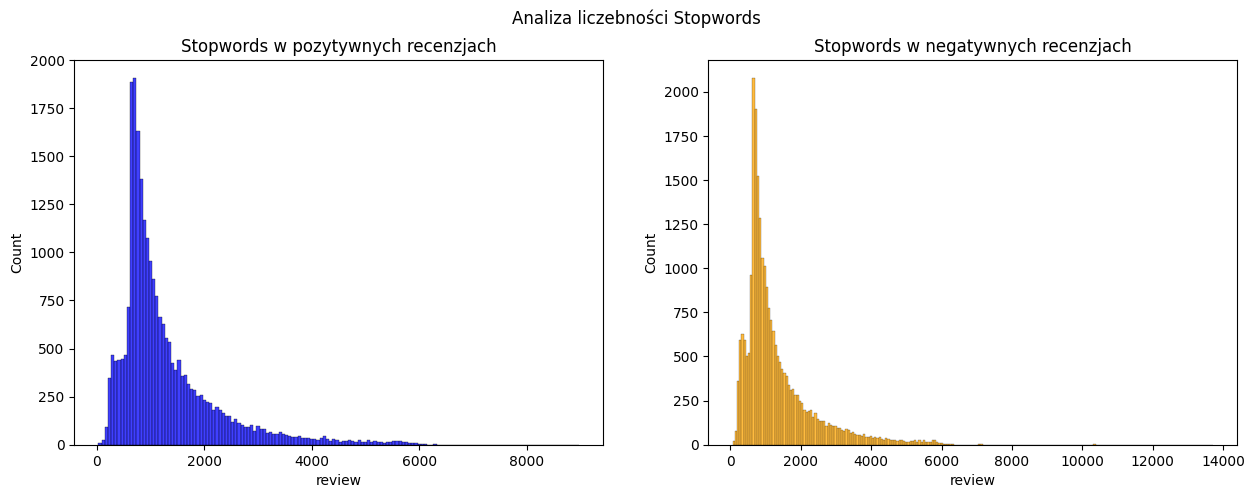

In [123]:

count_good_stops=count_good['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
count_bad_stops=count_bad['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
plot_count_1(count_good_stops,count_bad_stops,"Stopwords w pozytywnych recenzjach","Stopwords w negatywnych recenzjach","Analiza liczebności Stopwords")

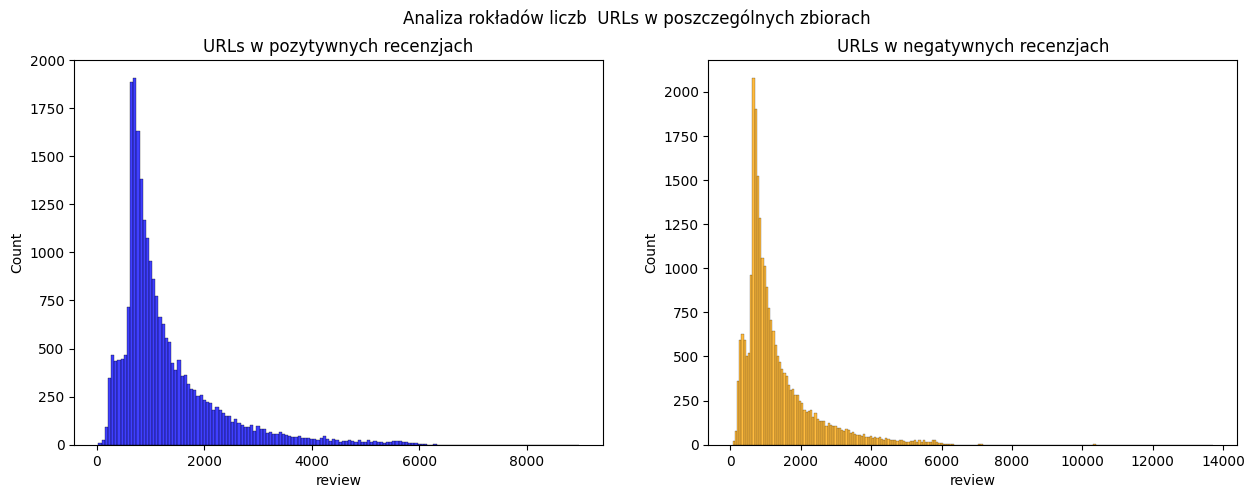

In [124]:
## Sprawdzenie liczb Urls

count_good_urls=count_good['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
count_bad_urls=count_bad['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

plot_count_1(count_good_stops,count_bad_stops,"URLs w pozytywnych recenzjach","URLs w negatywnych recenzjach","Analiza rokładów liczb  URLs w poszczególnych zbiorach")

<Axes: >

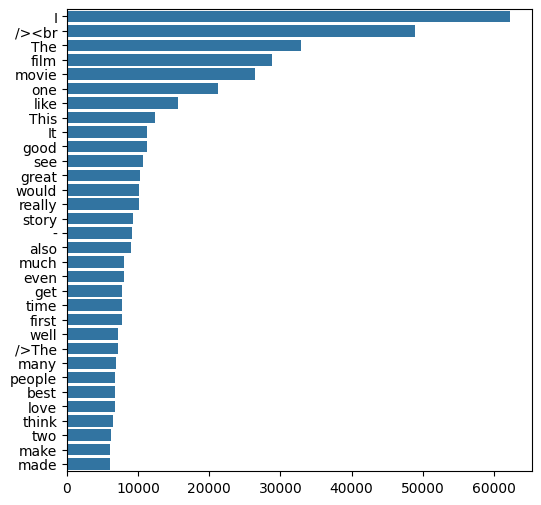

In [125]:
#Uproszczona funkcja zliczająca  counter function
def create_corpus(word):
    corpus=[]

    for x in train_df[train_df['sentiment']==word]['review'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus('positive')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

**Wnioski z analizy:**
  Zbiór danych jest zrównoważony.
  Zbiór danych zawiera taką samą liczbę semantyki dla przeglądów obu polaryzacji.
  Zbiór danych zawiera zbędne słowa i składnie HTML.
  Znaki interpunkcyjne/słowa stopu występują w zbiorze danych w równym rozkładzie.



----------------------------------------------------------------------------

**Analiza - część 2**

In [126]:
stopword=set(stopwords.words('english'))


In [127]:
import plotly

In [128]:
# Analiza Gram na danych treningowych - Bigram i Trigram


stopword=set(stopwords.words('english'))
def gram_analysis(data,gram):
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis

def create_dict(data,grams):
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            freq_dict[tokens]+=1
    return freq_dict

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace



def create_new_df(freq_dict,):
    freq_df=pd.DataFrame(sorted(freq_dict.items(),key=lambda z:z[1])[::-1])
    freq_df.columns=['n_gram_words','n_gram_frequency']
    #print(freq_df.head())
    #plt.barh(freq_df['n_gram_words'][:20],freq_df['n_gram_frequency'][:20],linewidth=0.3)
    #plt.show()
    trace=horizontal_bar_chart(freq_df[:20],'orange')
    return trace

def plot_grams(trace_zero,trace_one):
    fig = plotly.tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Częst. wyrazów rec. pozytywnych",
                                          "Częst. wyrazów rec. negatywnych"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Wykres częstotliwości wyrazów")
    py.iplot(fig, filename='word-plots')


In [129]:
train_df_zero=count_bad['review']
train_df_ones=count_good['review']


In [73]:
train_df_zero.shape

(25000,)

In [130]:
import plotly.io as pio
pio.renderers.default = 'colab' # or 'colab'


In [131]:
print("Analiza Bi-gram ")
freq_train_df_zero=create_dict(train_df_zero[:200],2)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],2)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)


Analiza Bi-gram 


In [132]:
print("Analiza Tri-gram ")
freq_train_df_zero=create_dict(train_df_zero[:200],3)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],3)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

Analiza Tri-gram 


In [133]:
#Analiza  Penta-Gram
print("Penta-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],5)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],5)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

Penta-gram analysis


**Czyśzczenie danych**

Ważnym aspektem jest obecność pewnych znaczników HTML i znaków interpunkcyjnych, które należy usunąć, ponieważ powodują one zamieszanie w zbiorze recenzji. Zostanie to uwzględnione w fazie czyszczenia.

Czyszczeniu będą podlegały:
  
*   Kody HTML
*   Adresy URL
*   Emotikony
*   Stopwords
*   Interpunkcja
*   Rozszerzanie skrótów
*   Adresy URL








In [153]:
%%time
import re
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data


train_df['review']=train_df['review'].apply(lambda z: remove_punctuations(z))
train_df['review']=train_df['review'].apply(lambda z: remove_html(z))
train_df['review']=train_df['review'].apply(lambda z: remove_url(z))
train_df['review']=train_df['review'].apply(lambda z: remove_emoji(z))


CPU times: user 6.34 s, sys: 91.1 ms, total: 6.43 s
Wall time: 6.61 s


In [154]:
train_df['review'][200:220]

200    Interesting and short television movie describ...
201    Any film about WWII made during WWII by a Brit...
202    A brilliant horror film Utterly gruesome and v...
203    I absolutely love this film Everything about i...
204    No one can say I wasnt warned as I have read t...
205    A new way to enjoy Goldsworthys work Rivers an...
206    If you liked William Hickey in Prizzis Honor h...
207    I have seen most if not all of the Laurel  Har...
208    I just started watching The Show around July I...
209    This film is well cast often silly and always ...
210    I have just given a 10 for Thieves Highway I m...
211    This movie was terrible The plot was terrible ...
212    I strongly dislike this show I mean like basic...
213    Normally I dont like series at all Theyre all ...
214    holy Sht this was god awful i sat in the theat...
215    This movie is without a doubt a perfect 1010 f...
216    I saw this at the London Film Festival last ni...
217    I cant believe this movi

In [148]:
dd=  train_df

In [141]:
## W tym przypadku niektóre zaimki skrócone zastąpimy pełnymi formami
#  (przykład: :"you've"---->you have")
# !!!!!!!!!!!!  problem , to trzeba zdebagować
#def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)
    data = re.sub(r"donå«t", "do not", data)
train_df['review']=train_df['review'].apply(lambda z: remove_abb(z))

In [155]:
count_good=train_df[train_df['sentiment']=='positive']
count_bad=train_df[train_df['sentiment']=='negative']

---------------------------------------------------------

**Vectorization and Embeddings**

 Te strategie wektoryzacji pozwalają na odpowiednie dopasowanie korpusu słów do zaawansowanej analizy semantycznej.

Istnieją 2 warianty przekształcenia korpusu tekstowego na wektor numeryczny:

    Vectorize without semantics
    Retain Semantic Importance

W pierwszym przypadku strategia wektoryzacji służy do zapewnienia rozkładu prawdopodobieństwa współwystępowania . Dostępne metody :
 TF-IDF
 Count vectorization/One hot vectorization
    
Metody te wykorzystują statystyczne prawdopodobieństwa współwystępowania i prawdopodobieństwa logarytmiczne w celu określenia często występujących zdań lub grup słów w korpusie.

Druga strategi może być zrealizowana przez:

    Static Embeddings: Word2Vec, Glove, Fasttext, Paragram
    Dynamic Embeddings: ELMO, BERT & its variants, XLNet/Transformer-XL

Wszystkie te osadzania opierają się na wstępnie wytrenowanych wektorach słów, w których każdemu słowu w korpusie przypisywany jest wynik probabilistyczny.

Prawdopodobieństwa te są wykreślane na płaszczyźnie niskowymiarowej, a „znaczenie” słów jest wywnioskowane z tych wektorów.

Ogólnie rzecz biorąc, odległość cosinusowa jest główną miarą pomiaru podobieństwa między wektorami słów i zdań w celu wnioskowania o podobieństwie.


**Vectorization - TFIDF and Count**

**TF-IDF (Term Frequency - Inverse Document Frequency)**

To przydatny algorytm, który na podstawie częstotliwości występowania słów określa, jak istotne są one dla danego dokumentu. Może stanowić doskonały punkt wyjścia do różnych zadań. Obejmuje to budowanie wyszukiwarek, podsumowywanie dokumentów lub inne zadania z zakresu wyszukiwania informacji i uczenia maszynowego

In [156]:
%%time
tfidf_vect=TfidfVectorizer(stop_words='english',ngram_range=(1,3))
train_tfidf=tfidf_vect.fit_transform(train_df['review'].values.tolist())
train_tfidf.shape

CPU times: user 1min 26s, sys: 4.23 s, total: 1min 30s
Wall time: 1min 37s


(50000, 8306877)

In [172]:
train_tfidf[1,500000]

0.0

In [163]:
v = train_df['review'].values.tolist()

In [167]:
v.count

<function list.count(value, /)>

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer


corpus = ['This is the first document',
          'This document is the second document',
          'And this is the third one',
          'Is this the first document',]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()


array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [174]:
print(X.shape)

(4, 9)


In [184]:
print(X)

  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483
